### Notes
* https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
* http://scikit-learn.org/stable/modules/manifold.html#t-sne
* http://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf
* https://www.kaggle.com/thykhuely/mercari-interactive-eda-topic-modelling
* https://www.dataquest.io/blog/build-a-data-science-portfolio/
* https://www.youtube.com/watch?v=NEaUSP4YerM
* http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
* https://www.stat.berkeley.edu/~spector/s133/Clus.html
* https://stats.stackexchange.com/questions/10540/how-to-interpret-mean-of-silhouette-plot
* Visualize clusters with and without tSNE
* Need to understand how to explain the variance of costs within the clusters
* Need to plot silhouette charts

In [157]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import seaborn as sns
from nltk import word_tokenize
from collections import Counter
from wordcloud import WordCloud
from string import punctuation
%matplotlib inline

In [158]:
file = 'http://bit.ly/aqmd-violations-final'
titlev = 'http://bit.ly/aqmd-titlev'
reclaim = 'http://bit.ly/aqmd-reclaim'

In [159]:
df_all = pd.read_csv(file)
df_titleV = pd.read_csv(titlev)
df_reclaim = pd.read_csv(reclaim)

In [160]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN


In [161]:
df_all['facility_type'] = ''

In [162]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,


In [163]:
df_titleV.head()

,Facility ID,Facility Name,City,County,Initial Issue Date,Renewal Date
0,35188,3M COMPANY,MONROVIA,LA,6/17/13,NaN
1,800088,3M COMPANY,CORONA,RV,5/9/00,5/4/12
2,45489,"ABBOTT CARDIOVASCULAR SYSTEMS, INC.",TEMECULA,RV,10/26/01,1/11/12
3,47084,ADVANCE PAPER BOX CO,LOS ANGELES,LA,8/13/01,9/16/11
4,57390,ADVANCE TRUCK PAINTING INC,PICO RIVERA,LA,4/16/01,6/7/11


In [164]:
df_reclaim.head()

,Fac_id
0,136
1,346
2,550
3,1073
4,1744


In [165]:
reclaim_list = df_reclaim['Fac_id'].tolist()

In [166]:
titlev_list = df_titleV['Facility ID'].tolist()

In [167]:
reclaim_titlev_list = [facility for facility in titlev_list if facility in reclaim_list]

In [168]:
list_error = []
for index, row in df_all.iterrows():
    try:
        pd.to_numeric(row['facility id'])
    except:
        list_error.append(row)
list_error

[facility id                                                  16, 20
 notification                                                 P57290
 Attorney                                                        WBW
 Total                                                         40000
 url               http://www3.aqmd.gov/webappl/fim/prog/novdetai...
 violation_data    failure to conduct NOx emissions checks monthl...
 equipment                                                       NaN
 facility_type                                                      
 Name: 475, dtype: object,
 facility id                                                  16, 20
 notification                                                 P57290
 Attorney                                                        FAC
 Total                                                         40000
 url               http://www3.aqmd.gov/webappl/fim/prog/novdetai...
 violation_data    failure to conduct NOx emissions checks monthl...
 equipm

In [169]:
for each in list_error:
    print(each['facility id'])

16, 20
16, 20
16, 20
2344 2
202, 2
31, 20
31, 20
10/1
10/1
10/1


In [170]:
for each in list_error:
    print(each['notification'])

P57290
P57290
P57290
P63673
HRB2169
SRV97
SRV97
HRB2187
HRB2191
HRB2191


In [171]:
df_all.iloc[475]['facility id']
df_all.set_value(475, 'facility id', '50134')

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,


In [172]:
df_all.iloc[476]
df_all.set_value(476, 'facility id', '50134')

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,


In [173]:
df_all.iloc[477]
df_all.set_value(477, 'facility id', '50134')

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,


In [174]:
df_all.iloc[1284]
df_all.set_value(1284, 'facility id', '2344')

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,


In [175]:
list_error = []
for index, row in df_all.iterrows():
    try:
        pd.to_numeric(row['facility id'])
    except:
        list_error.append(row)
list_error

[facility id                                                  202, 2
 notification                                                HRB2169
 Attorney                                                        INT
 Total                                                          1000
 url               http://www3.aqmd.gov/webappl/fim/prog/novdetai...
 violation_data                                                  NaN
 equipment                                                       NaN
 facility_type                                                      
 Name: 1695, dtype: object,
 facility id                                                  31, 20
 notification                                                  SRV97
 Attorney                                                        WBW
 Total                                                        213376
 url               http://www3.aqmd.gov/webappl/fim/prog/novdetai...
 violation_data                                                  NaN
 equip

In [176]:
for each in list_error:
    print(each['facility id'])

202, 2
31, 20
31, 20
10/1
10/1
10/1


In [177]:
for each in list_error:
    print(each['notification'])

HRB2169
SRV97
SRV97
HRB2187
HRB2191
HRB2191


In [178]:
df_all.drop(df_all.index[1695])

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,


In [179]:
list_error = []
for index, row in df_all.iterrows():
    try:
        pd.to_numeric(row['facility id'])
    except:
        list_error.append(row)
        print(index)

1695
2066
2067
3138
3140
3141


In [180]:
df_all = df_all.drop(df_all.index[[1695,
2066,
2067,
3138,
3140,
3141]])

In [181]:
list_error = []
for index, row in df_all.iterrows():
    try:
        pd.to_numeric(row['facility id'])
    except:
        list_error.append(row)
        print(index)

In [182]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,


In [183]:
index_row = []
for index, row in df_all.iterrows():
    try:
        if float(row['facility id']) in titlev_list:
            df_all.set_value(index, 'facility_type', 't')
        elif float(row['facility id']) in reclaim_list:
            df_all.set_value(index, 'facility_type', 'r')
        else:
            df_all.set_value(index, 'facility_type', 'n')
    except:
        index_row.append(row)
index_row

[]

In [184]:
index_row = []
for index, row in df_all.iterrows():
    try:
        if float(row['facility id']) in reclaim_titlev_list:
            df_all.set_value(index, 'facility_type', 'rt')
    except:
        index_row.append(row)
index_row

[]

In [185]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,rt
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,rt
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,t
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,t
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,n


In [186]:
df_all.shape

(3682, 8)

In [187]:
df_rt = df_all[(df_all['facility_type'] == 'rt')]
df_rt.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.0,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,rt
1,3704,P56323,KCM,7200.0,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,rt
19,11034,P55543,TRB,1000.0,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,The electronic report of daily mass emissions ...,NaN,rt
20,800026,SRV105,KCM,71200.0,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,NaN,NaN,rt
69,800408,P59376,TRB,1000.0,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating Device #C160 contrary to permit cond...,NaN,rt


In [188]:
df_facility_average = df_all.groupby(['facility_type'], as_index=False).mean()
df_facility_average

,facility_type,Total
0,n,11762.097454
1,r,38479.358108
2,rt,523801.033898
3,t,446882.295084


In [189]:
punctuation_symbols = []
for each in list(punctuation):
    punctuation_symbols.append((each))

In [190]:
set(df_all['facility_type'].tolist())

{'n', 'r', 'rt', 't'}

In [191]:
len(df_all['facility_type'].tolist())

3682

In [192]:
df_all = df_all.dropna(subset=['violation_data'])
df_all.shape

(3336, 8)

In [193]:
def remove_puncuation(d):
    for each in punctuation_symbols:
        d = d.replace(each, '')
    return d

In [194]:
def remove_digits(x):
    x = ''.join([i for i in x if not i.isdigit()])
    return x

In [195]:
df_all['violation_data'] = df_all.violation_data.apply(remove_digits)
df_all['violation_data'] = df_all.violation_data.apply(remove_puncuation)
df_all['violation_data'] = df_all['violation_data'].str.lower()

In [196]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failed to reconcile quarterly nox emissions in...,NOX RECLAIM facility,rt
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,inaccurate qcers inaccurate apep,NOx RECLAIM facility,rt
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to keep the roof of internal floating ...,NaN,t
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to operate and maintain a continuous m...,NaN,t
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,selling architectural coatings within the scaq...,NaN,n


In [197]:
facility_type_ = dict()
type_list = ['rt', 't', 'r', 'n']
for each in type_list:
    text = ' '.join(df_all.loc[df_all['facility_type'] == each, 'violation_data'].values)
    facility_type_[each] = word_tokenize(text)

In [198]:
none_top100 = Counter(facility_type_['n']).most_common(100)
reclaim_top100 = Counter(facility_type_['r']).most_common(100)
titlev_top100 = Counter(facility_type_['t']).most_common(100)
reclaim_titlev_top100 = Counter(facility_type_['rt']).most_common(100)

In [199]:
def create_wordcloud(d):
    wordcloud = WordCloud(background_color='white',
                          max_words=75, 
                          max_font_size=40,
                          random_state=42).generate(str(d))
    return wordcloud

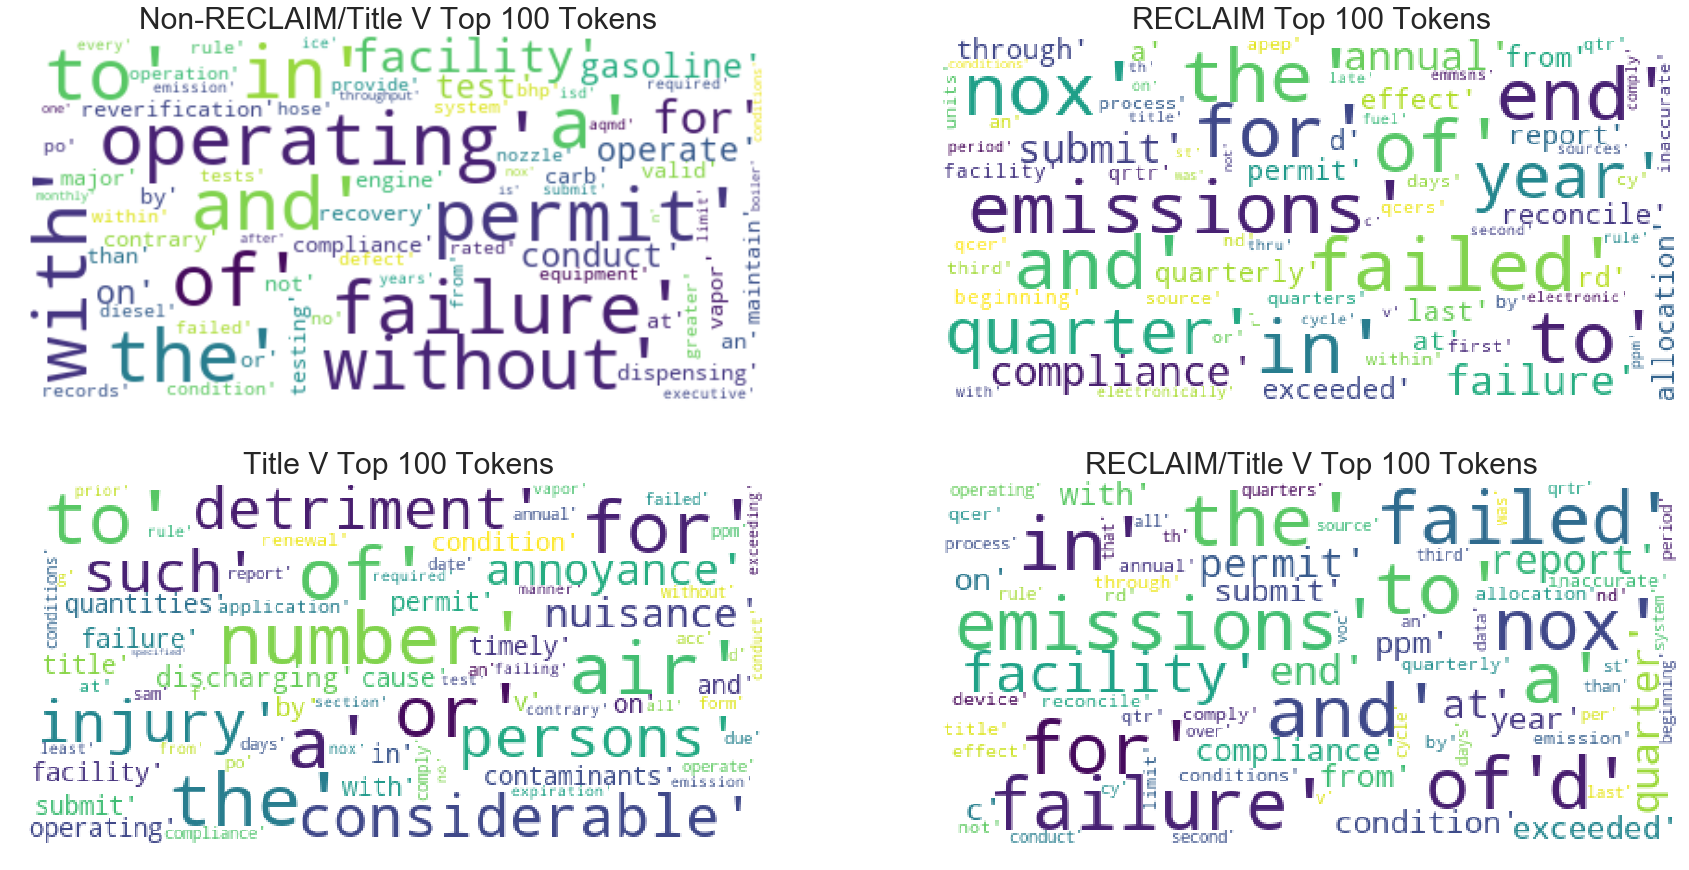

In [200]:
fig, axes = plt.subplots(2, 2, figsize=(30, 15))

ax = axes[0, 0]
ax.imshow(create_wordcloud(none_top100), interpolation="bilinear")
ax.axis('off')
ax.set_title("Non-RECLAIM/Title V Top 100 Tokens", fontsize=30)

ax = axes[0, 1]
ax.imshow(create_wordcloud(reclaim_top100))
ax.axis('off')
ax.set_title("RECLAIM Top 100 Tokens", fontsize=30)

ax = axes[1, 0]
ax.imshow(create_wordcloud(titlev_top100))
ax.axis('off')
ax.set_title("Title V Top 100 Tokens", fontsize=30)

ax = axes[1, 1]
ax.imshow(create_wordcloud(reclaim_titlev_top100))
ax.axis('off')
ax.set_title("RECLAIM/Title V Top 100 Tokens", fontsize=30)
plt.show()

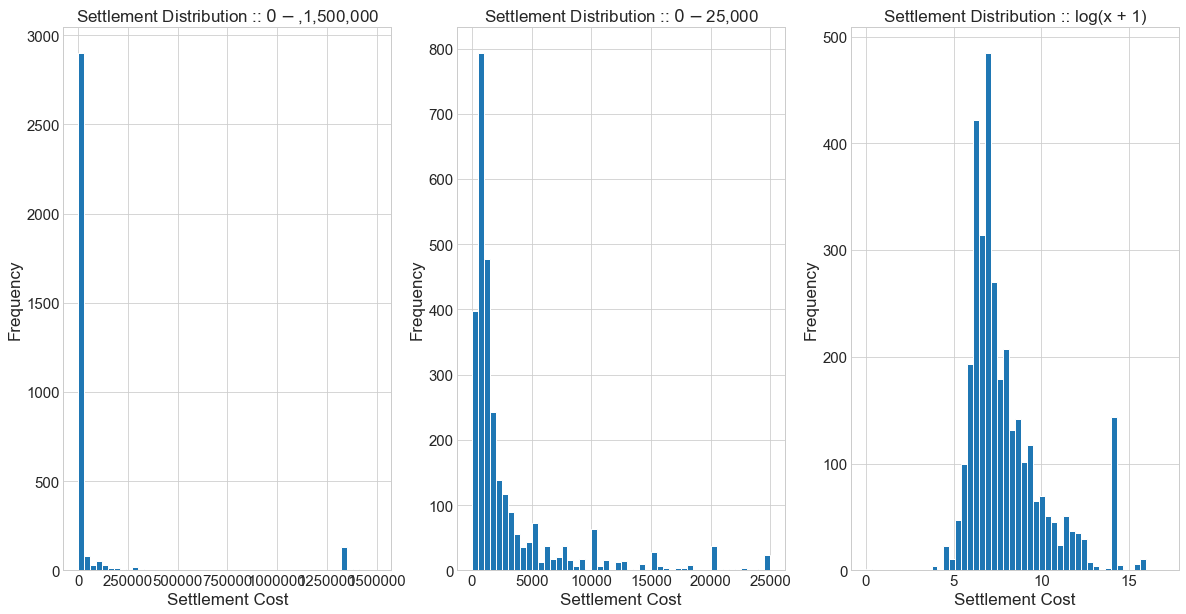

In [201]:
plt.subplot(1, 3, 1)
(df_all['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,1500000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$,1,500,000', fontsize=17)

plt.subplot(1, 3, 2)
(df_all['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,25000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$25,000', fontsize=17)

plt.subplot(1, 3, 3)
(np.log(df_all['Total'] + 1)).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,17])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: log(x + 1)', fontsize=17)
plt.show()

#https://www.quora.com/What-are-the-downsides-when-using-log-x-+-1-as-ones-log-transformation
#http://onbiostatistics.blogspot.com/2012/05/logx1-data-transformation.html

In [202]:
facility_count = df_all[['Total','facility_type']].groupby(['facility_type'], as_index =False).count()
facility_count

,facility_type,Total
0,n,2552
1,r,142
2,rt,282
3,t,360


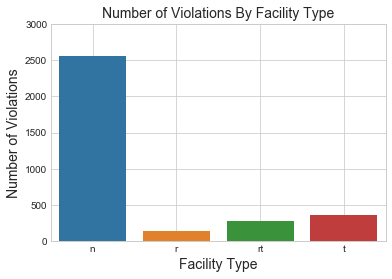

In [203]:
sns.barplot(facility_count['facility_type'], facility_count['Total'])
plt.grid(True)
plt.ylim(0, 3000, 100)
plt.xlabel('Facility Type', fontsize = 14)
plt.ylabel('Number of Violations', fontsize = 14)
plt.title('Number of Violations By Facility Type', fontsize = 14)
plt.show()

In [204]:
df_none = df_all[df_all['facility_type'] == 'n'].reset_index(drop=True)
df_rt = df_all[df_all['facility_type'] == 'rt'].reset_index(drop=True)
df_r = df_all[df_all['facility_type'] == 'r'].reset_index(drop=True)
df_t = df_all[df_all['facility_type'] == 't'].reset_index(drop=True)

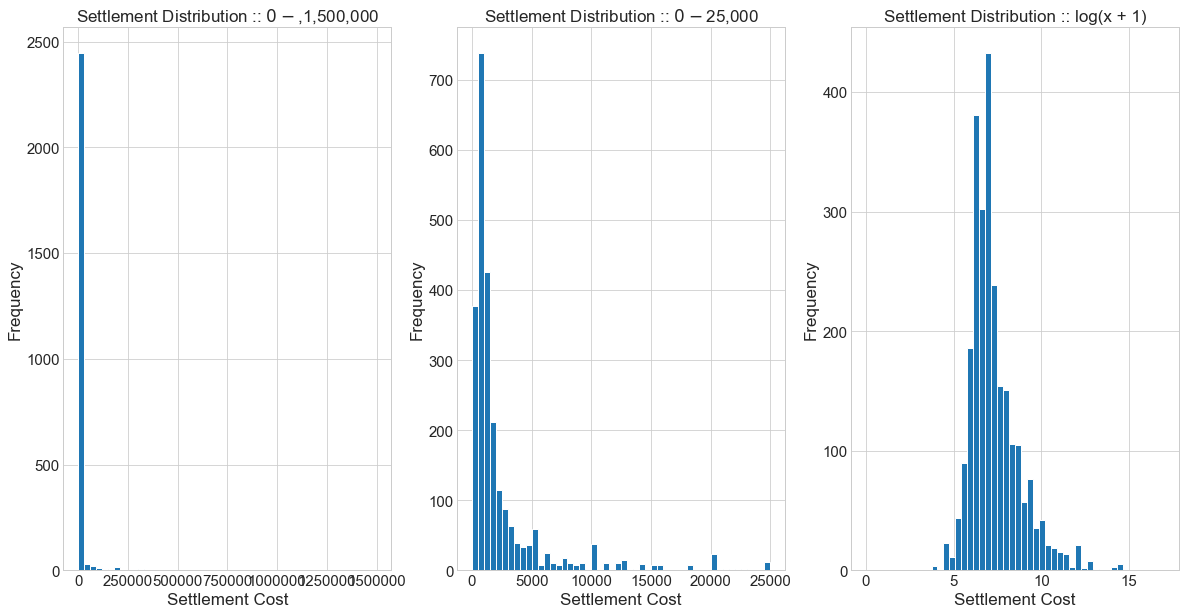

In [205]:
plt.subplot(1, 3, 1)
(df_none['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,1500000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$,1,500,000', fontsize=17)

plt.subplot(1, 3, 2)
(df_none['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,25000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$25,000', fontsize=17)

plt.subplot(1, 3, 3)
(np.log(df_none['Total'] + 1)).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,17])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: log(x + 1)', fontsize=17)
plt.show()

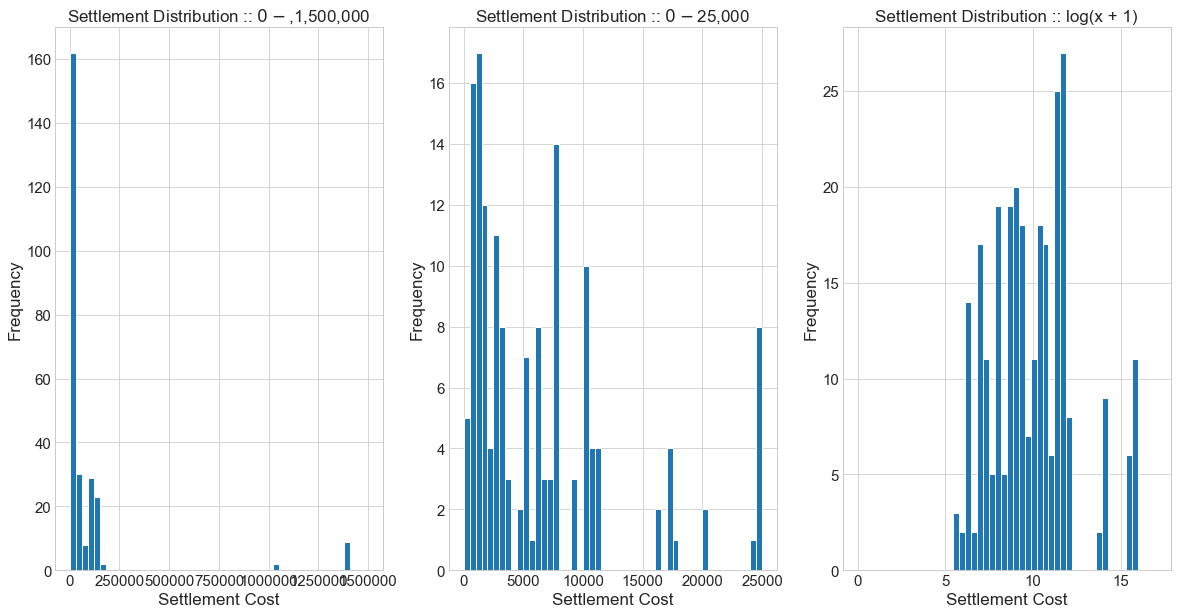

In [206]:
plt.subplot(1, 3, 1)
(df_rt['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,1500000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$,1,500,000', fontsize=17)

plt.subplot(1, 3, 2)
(df_rt['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,25000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$25,000', fontsize=17)

plt.subplot(1, 3, 3)
(np.log(df_rt['Total'] + 1)).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,17])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: log(x + 1)', fontsize=17)
plt.show()

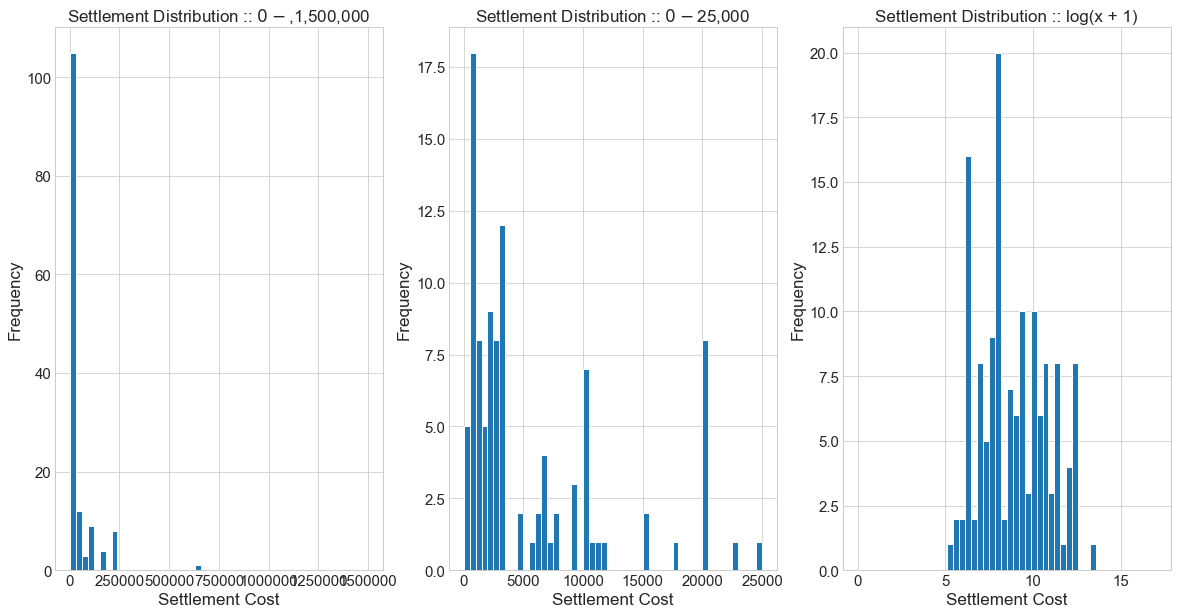

In [207]:
plt.subplot(1, 3, 1)
(df_r['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,1500000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$,1,500,000', fontsize=17)

plt.subplot(1, 3, 2)
(df_r['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,25000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$25,000', fontsize=17)

plt.subplot(1, 3, 3)
(np.log(df_r['Total'] + 1)).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,17])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: log(x + 1)', fontsize=17)
plt.show()

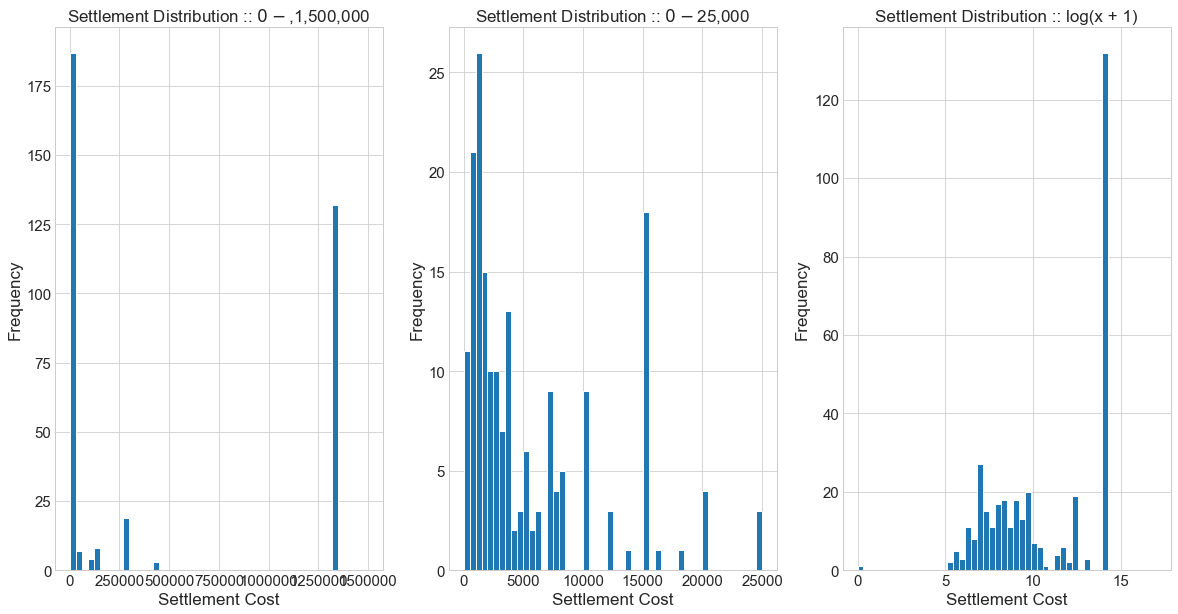

In [208]:
plt.subplot(1, 3, 1)
(df_t['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,1500000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$,1,500,000', fontsize=17)

plt.subplot(1, 3, 2)
(df_t['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,25000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$25,000', fontsize=17)

plt.subplot(1, 3, 3)
(np.log(df_t['Total'] + 1)).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,17])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: log(x + 1)', fontsize=17)
plt.show()

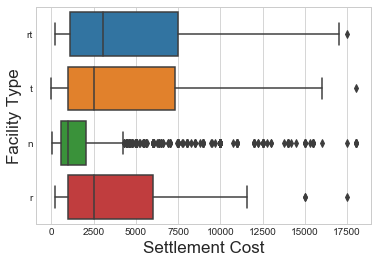

In [209]:
sns.set_style('whitegrid')
data = df_all[df_all['Total'] < 20000]
ax = sns.boxplot(x="Total", y="facility_type", data=data)
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Facility Type', fontsize=17)
plt.show()

In [210]:
min_df = 0.01
max_df = 0.90
vect = CountVectorizer(stop_words='english', min_df=min_df, max_df=max_df, ngram_range=(3,4))

In [211]:
X = df_all['violation_data']
y = df_all['facility_type']

In [212]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failed to reconcile quarterly nox emissions in...,NOX RECLAIM facility,rt
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,inaccurate qcers inaccurate apep,NOx RECLAIM facility,rt
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to keep the roof of internal floating ...,NaN,t
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to operate and maintain a continuous m...,NaN,t
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,selling architectural coatings within the scaq...,NaN,n


In [213]:
def determine_length(d):
    d = d.split(' ')
    return len(d)

In [214]:
df_all['violation_length'] = df_all['violation_data'].apply(determine_length)

In [215]:
df_all.iloc[1]['violation_data']

'inaccurate qcers  inaccurate apep'

In [216]:
df_all.iloc[1]['violation_length']

5

In [217]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type,violation_length
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failed to reconcile quarterly nox emissions in...,NOX RECLAIM facility,rt,45
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,inaccurate qcers inaccurate apep,NOx RECLAIM facility,rt,5
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to keep the roof of internal floating ...,NaN,t,23
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to operate and maintain a continuous m...,NaN,t,15
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,selling architectural coatings within the scaq...,NaN,n,31


In [218]:
df_len_cost = df_all[['Total', 'violation_length']].groupby(['violation_length'], as_index=False).mean()
df_len_cost.head()

,violation_length,Total
0,1,5187.5000
1,2,839860.0000
2,3,24143.7500
3,4,20280.0000
4,5,101225.3125


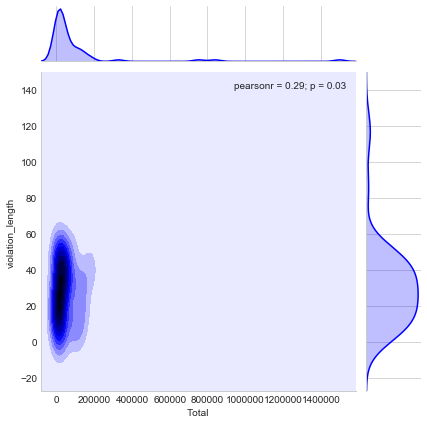

In [219]:
plt.figure(figsize = (10, 10))
sns.jointplot(x=df_len_cost["Total"], y=df_len_cost["violation_length"], kind='kde', color = 'b')
plt.show()

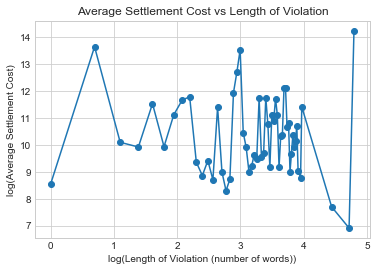

In [220]:
x = np.log(df_len_cost['violation_length'])
y = np.log(df_len_cost['Total'])
plt.scatter(x, y)
plt.plot(x, y)
plt.ylabel('log(Average Settlement Cost)')
plt.xlabel('log(Length of Violation (number of words))')
plt.title('Average Settlement Cost vs Length of Violation')
plt.show()

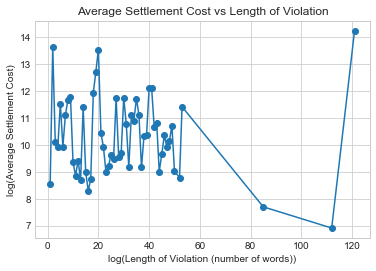

In [221]:
x = (df_len_cost['violation_length'])
y = np.log(df_len_cost['Total'])
plt.scatter(x, y)
plt.plot(x, y)
plt.ylabel('log(Average Settlement Cost)')
plt.xlabel('log(Length of Violation (number of words))')
plt.title('Average Settlement Cost vs Length of Violation')
plt.show()

In [222]:
start = time.time()

metric_ = []
silhouette_avg_ = []
for i in range(2, 25):
    min_df = 0.01
    max_df = 0.90
    vect = CountVectorizer(stop_words='english', min_df=min_df, max_df=max_df, ngram_range=(3,4))
    X_dtm = vect.fit_transform(X)
    kmeans = KMeans(n_clusters=i, random_state=10)
    kmeans.fit(X_dtm)
    metric_.append(kmeans.inertia_)
    labels = kmeans.predict(X_dtm)
    silhouette_avg = silhouette_score(X_dtm, labels)
    silhouette_avg_.append(silhouette_avg)

end = time.time()
print('Elapsed time: ', end - start, 'seconds')

Elapsed time:  23.60304594039917 seconds


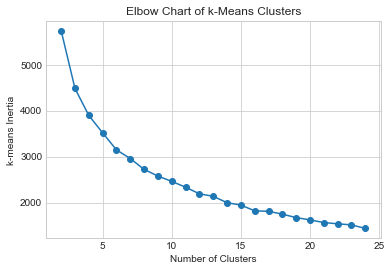

In [223]:
cluster = [x for x in range(2, 25)]
plt.scatter(cluster, metric_)
plt.plot(cluster, metric_)
plt.ylabel('k-means Inertia')
plt.xlabel('Number of Clusters')
plt.title('Elbow Chart of k-Means Clusters')
plt.show()

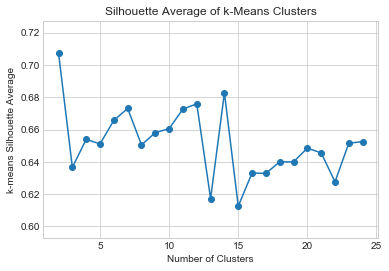

In [224]:
cluster = [x for x in range(2, 25)]
plt.scatter(cluster, silhouette_avg_)
plt.plot(cluster, silhouette_avg_)
plt.ylabel('k-means Silhouette Average')
plt.xlabel('Number of Clusters')
plt.title('Silhouette Average of k-Means Clusters')
plt.show()

In [225]:
silhouette_avg_

[0.70735448025767356,
 0.63656584787553794,
 0.65390424200296726,
 0.6510859604065462,
 0.66564172171420866,
 0.67306086625088102,
 0.65047513919888722,
 0.65802885357637597,
 0.6605519885232759,
 0.67270415517051974,
 0.67587547965489492,
 0.61723884898192216,
 0.68275336731151315,
 0.61255903652670829,
 0.63308160697815807,
 0.63281698821614363,
 0.64000256460168137,
 0.63994252619880632,
 0.64848175254241147,
 0.6455149639192661,
 0.62762006781954927,
 0.65155671635690648,
 0.65246865759865602]

In [226]:
silhouette_avg_[5]

0.67306086625088102

In [227]:
X_dtm = vect.fit_transform(X)
kmeans = KMeans(n_clusters=7, random_state=10)
kmeans.fit(X_dtm)
labels = kmeans.predict(X_dtm)
labels

array([5, 1, 1, ..., 1, 1, 1], dtype=int32)

In [228]:
model = TSNE(learning_rate=90)
transformed = model.fit_transform(X_dtm.toarray())

In [229]:
tsne_df = pd.DataFrame(transformed, columns=['x', 'y'])
tsne_df['violation_text'] = df_all['violation_data']
tsne_df['facility_type'] = df_all['facility_type']
tsne_df['Total_Settlement'] = df_all['Total']
tsne_df['Cluster'] = labels

In [231]:
tsne_df.head()

,x,y,violation_text,facility_type,Total_Settlement,Cluster
0,23.225883,-22.685646,failed to reconcile quarterly nox emissions in...,rt,7200.00,5
1,-0.234755,-0.769315,inaccurate qcers inaccurate apep,rt,7200.00,1
2,-0.256067,-0.780967,failure to keep the roof of internal floating ...,t,3500.00,1
3,-1.280349,-1.207836,failure to operate and maintain a continuous m...,t,3500.00,1
4,0.509360,0.172399,selling architectural coatings within the scaq...,n,9438.66,1


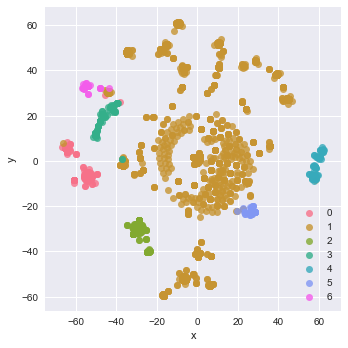

In [241]:
sns.lmplot( x="x", y="y", data=tsne_df, fit_reg=False, hue='Cluster', legend=False)
plt.legend(loc='lower right')
plt.show()

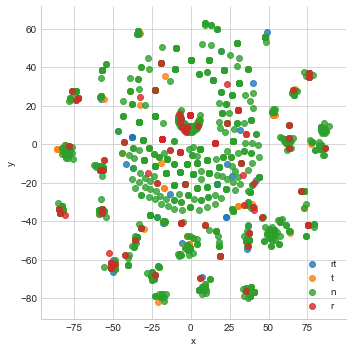

In [152]:
model = TSNE(learning_rate=90)
transformed = model.fit_transform(X_dtm.toarray())

tsne_df = pd.DataFrame(transformed, columns=['x', 'y'])
tsne_df['violation_text'] = df_all['violation_data']
tsne_df['facility_type'] = df_all['facility_type']
tsne_df['Total_Settlement'] = df_all['Total']

sns.lmplot( x="x", y="y", data=tsne_df, fit_reg=False, hue='facility_type', legend=False)
plt.legend(loc='lower right')
plt.show()

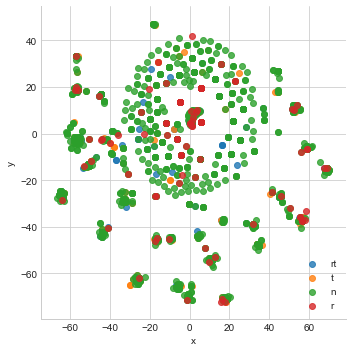

In [153]:
plt.figure(figsize=(20,10))
model = TSNE(learning_rate=100)
transformed = model.fit_transform(X_dtm.toarray())

tsne_df = pd.DataFrame(transformed, columns=['x', 'y'])
tsne_df['violation_text'] = df_all['violation_data']
tsne_df['facility_type'] = df_all['facility_type']
tsne_df['Total_Settlement'] = df_all['Total']

sns.lmplot( x="x", y="y", data=tsne_df, fit_reg=False, hue='facility_type', legend=False)
plt.legend(loc='lower right')
plt.show()

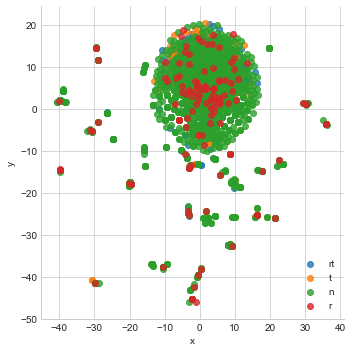

In [154]:
plt.figure(figsize=(20,10))
model = TSNE(learning_rate=150)
transformed = model.fit_transform(X_dtm.toarray())

tsne_df = pd.DataFrame(transformed, columns=['x', 'y'])
tsne_df['violation_text'] = df_all['violation_data']
tsne_df['facility_type'] = df_all['facility_type']
tsne_df['Total_Settlement'] = df_all['Total']

sns.lmplot( x="x", y="y", data=tsne_df, fit_reg=False, hue='facility_type', legend=False)
plt.legend(loc='lower right')
plt.show()

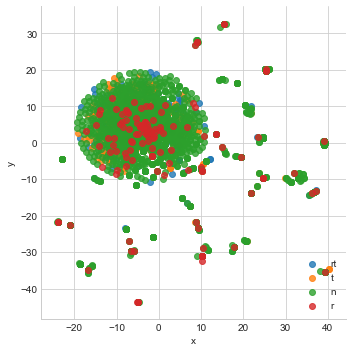

In [155]:
plt.figure(figsize=(20,10))
model = TSNE(learning_rate=200)
transformed = model.fit_transform(X_dtm.toarray())

tsne_df = pd.DataFrame(transformed, columns=['x', 'y'])
tsne_df['violation_text'] = df_all['violation_data']
tsne_df['facility_type'] = df_all['facility_type']
tsne_df['Total_Settlement'] = df_all['Total']

sns.lmplot( x="x", y="y", data=tsne_df, fit_reg=False, hue='facility_type', legend=False)
plt.legend(loc='lower right')
plt.show()

In [72]:
silhouette_avg = silhouette_score(X_dtm, labels)
silhouette_avg

0.67306086625088102

In [73]:
df_all['cluster_label'] = pd.Series(labels, index=df_all.index)
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type,violation_length,cluster_label
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failed to reconcile quarterly nox emissions in...,NOX RECLAIM facility,rt,45,5
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,inaccurate qcers inaccurate apep,NOx RECLAIM facility,rt,5,1
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to keep the roof of internal floating ...,NaN,t,23,1
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to operate and maintain a continuous m...,NaN,t,15,1
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,selling architectural coatings within the scaq...,NaN,n,31,1


In [74]:
print('The set has a feature vector that is ', len(vect.get_feature_names()), 'in length')

The set has a feature vector that is  98 in length


In [75]:
facility_type_ = dict()
type_list = range(0, 7)
for each in type_list:
    text = ' '.join(df_all.loc[df_all['cluster_label'] == each, 'violation_data'].values)
    facility_type_[each] = word_tokenize(text)

In [76]:
group_zero = Counter(facility_type_[0]).most_common(100)
group_one = Counter(facility_type_[1]).most_common(100)
group_two = Counter(facility_type_[2]).most_common(100)
group_three = Counter(facility_type_[3]).most_common(100)
group_four = Counter(facility_type_[4]).most_common(100)
group_five = Counter(facility_type_[5]).most_common(100)
group_six = Counter(facility_type_[6]).most_common(100)

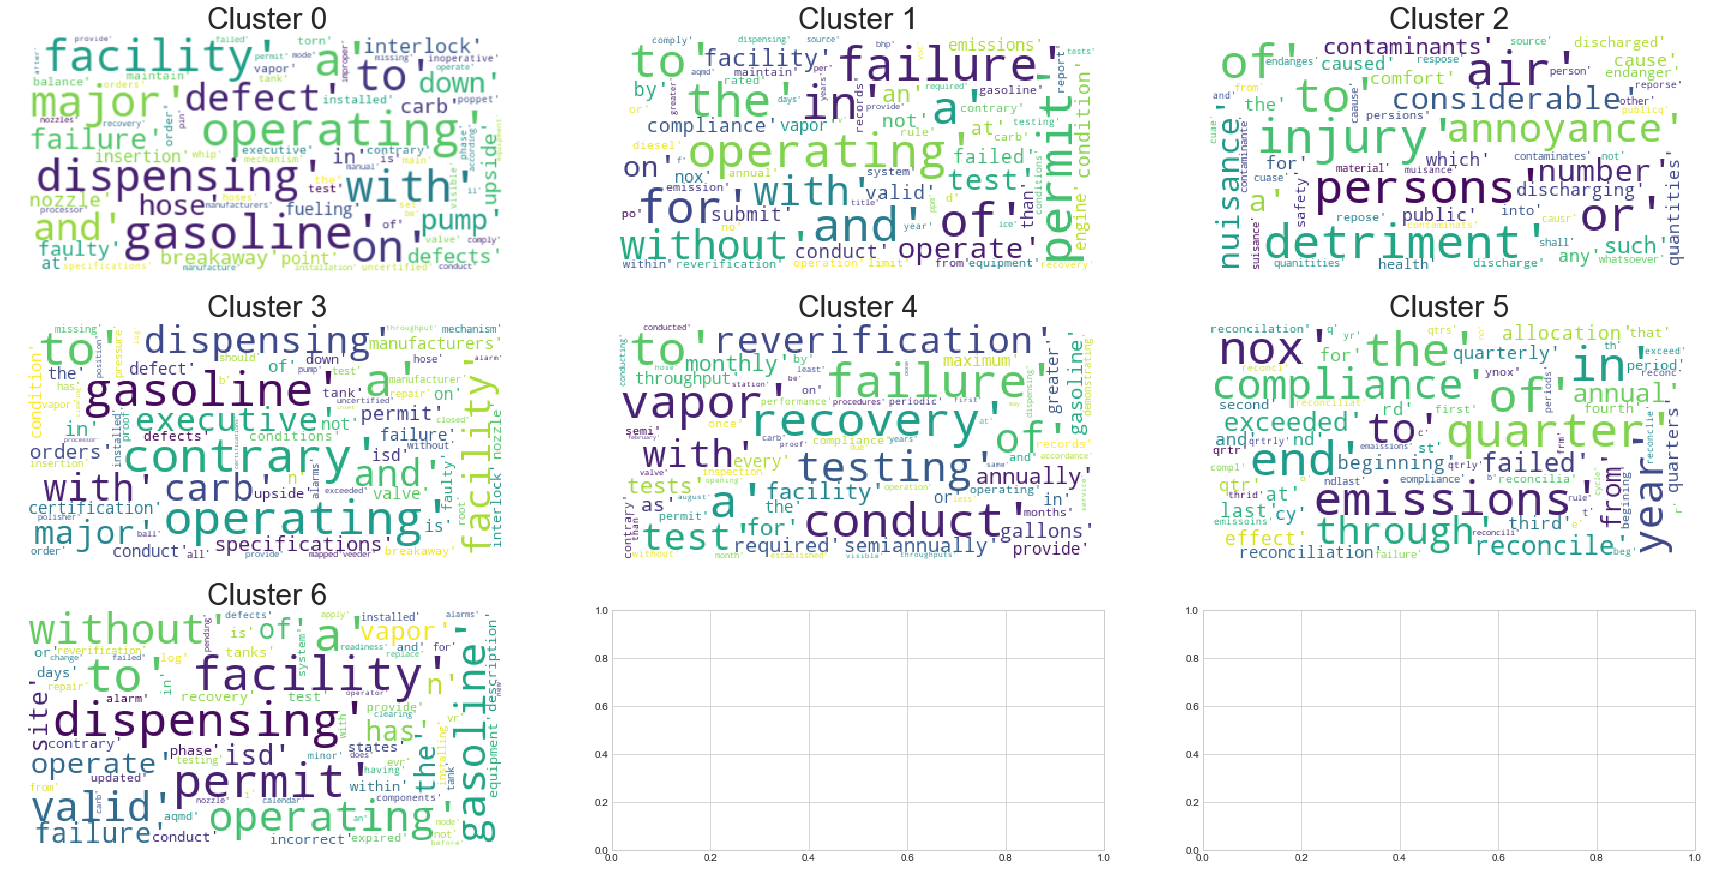

In [77]:
fig, axes = plt.subplots(3, 3, figsize=(30, 15))

ax = axes[0, 0]
ax.imshow(create_wordcloud(group_zero), interpolation="bilinear")
ax.axis('off')
ax.set_title("Cluster 0", fontsize=30)

ax = axes[0, 1]
ax.imshow(create_wordcloud(group_one))
ax.axis('off')
ax.set_title("Cluster 1", fontsize=30)

ax = axes[0, 2]
ax.imshow(create_wordcloud(group_two))
ax.axis('off')
ax.set_title("Cluster 2", fontsize=30)

ax = axes[1, 0]
ax.imshow(create_wordcloud(group_three))
ax.axis('off')
ax.set_title("Cluster 3", fontsize=30)

ax = axes[1, 1]
ax.imshow(create_wordcloud(group_four))
ax.axis('off')
ax.set_title("Cluster 4", fontsize=30)

ax = axes[1, 2]
ax.imshow(create_wordcloud(group_five))
ax.axis('off')
ax.set_title("Cluster 5", fontsize=30)

ax = axes[2, 0]
ax.imshow(create_wordcloud(group_six))
ax.axis('off')
ax.set_title("Cluster 6", fontsize=30)
plt.show()

In [78]:
df_cross_tab = df_all.iloc[:, 7:11]
cross_tab_summary = pd.crosstab(df_cross_tab['facility_type'], df_cross_tab['cluster_label'])
cross_tab_summary 

cluster_label,0,1,2,3,4,5,6
facility_type,,,,,,,
n,147,2143,11,110,95,1,45
r,0,113,2,1,0,26,0
rt,0,262,0,1,0,19,0
t,0,208,152,0,0,0,0


In [79]:
df_all[df_all['cluster_label'] == 0].describe()

,Total,violation_length,cluster_label
count,147.000000,147.000000,147.0
mean,1182.544218,25.693878,0.0
std,1533.198212,9.142414,0.0
min,225.000000,12.000000,0.0
25%,500.000000,17.500000,0.0
50%,700.000000,23.000000,0.0
75%,1100.000000,34.000000,0.0
max,10000.000000,46.000000,0.0


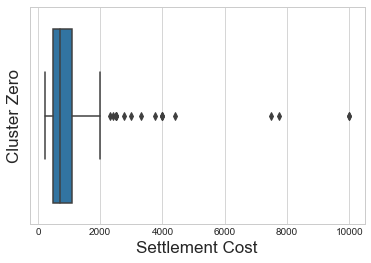

In [80]:
df_zero = df_all[df_all['cluster_label'] == 0].reset_index(drop=True)
sns.set_style('whitegrid')
data = df_zero
ax = sns.boxplot(df_zero['Total'], data=data)
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Cluster Zero', fontsize=17)
plt.show()

In [81]:
df_all[df_all['cluster_label'] == 1].describe()

,Total,violation_length,cluster_label
count,2.726000e+03,2726.000000,2726.0
mean,6.789427e+04,23.238811,1.0
std,5.828348e+05,11.106780,0.0
min,0.000000e+00,1.000000,1.0
25%,7.000000e+02,14.000000,1.0
50%,1.500000e+03,22.000000,1.0
75%,5.227800e+03,32.000000,1.0
max,8.100000e+06,121.000000,1.0


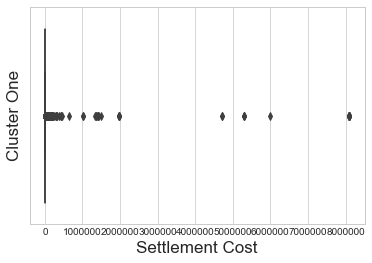

In [82]:
df_one = df_all[df_all['cluster_label'] == 1].reset_index(drop=True)
sns.set_style('whitegrid')
data = df_one
ax = sns.boxplot(df_one['Total'], data=data)
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Cluster One', fontsize=17)
plt.show()

In [83]:
df_all[df_all['cluster_label'] == 2].describe()

,Total,violation_length,cluster_label
count,1.650000e+02,165.000000,165.0
mean,1.100113e+06,20.612121,2.0
std,4.842683e+05,3.171112,0.0
min,6.000000e+02,18.000000,2.0
25%,1.344001e+06,20.000000,2.0
50%,1.344001e+06,20.000000,2.0
75%,1.344001e+06,20.000000,2.0
max,1.344001e+06,40.000000,2.0


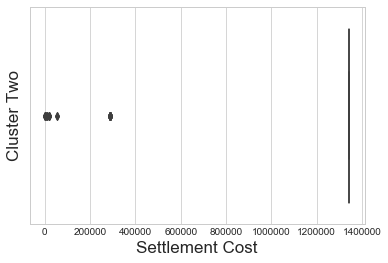

In [84]:
df_two = df_all[df_all['cluster_label'] == 2].reset_index(drop=True)
sns.set_style('whitegrid')
data = df_two
ax = sns.boxplot(df_two['Total'], data=data)
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Cluster Two', fontsize=17)
plt.show()

In [85]:
df_all[df_all['cluster_label'] == 3].describe()

,Total,violation_length,cluster_label
count,112.000000,112.000000,112.0
mean,1420.741071,28.535714,3.0
std,1892.153517,7.295474,0.0
min,200.000000,14.000000,3.0
25%,500.000000,22.000000,3.0
50%,725.000000,30.000000,3.0
75%,1367.500000,36.000000,3.0
max,12000.000000,41.000000,3.0


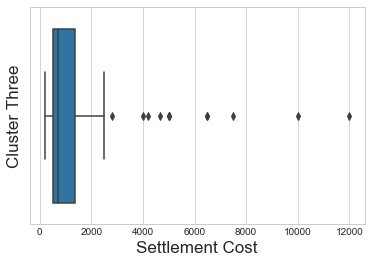

In [86]:
df_three = df_all[df_all['cluster_label'] == 3].reset_index(drop=True)
sns.set_style('whitegrid')
data = df_three
ax = sns.boxplot(df_three['Total'], data=data)
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Cluster Three', fontsize=17)
plt.show()

In [87]:
df_all[df_all['cluster_label'] == 4].describe()

,Total,violation_length,cluster_label
count,95.000000,95.000000,95.0
mean,1091.684211,25.378947,4.0
std,1415.337455,10.134394,0.0
min,100.000000,8.000000,4.0
25%,525.000000,17.000000,4.0
50%,800.000000,25.000000,4.0
75%,1200.000000,36.000000,4.0
max,12500.000000,42.000000,4.0


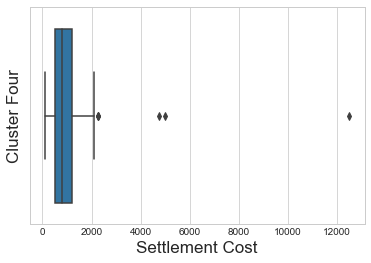

In [88]:
df_four = df_all[df_all['cluster_label'] == 4].reset_index(drop=True)
sns.set_style('whitegrid')
data = df_four
ax = sns.boxplot(df_four['Total'], data=data)
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Cluster Four', fontsize=17)
plt.show()

In [89]:
df_all[df_all['cluster_label'] == 5].describe()

,Total,violation_length,cluster_label
count,46.000000,46.000000,46.0
mean,22339.130435,43.608696,5.0
std,40481.350868,2.389591,0.0
min,500.000000,35.000000,5.0
25%,3000.000000,43.000000,5.0
50%,6850.000000,44.000000,5.0
75%,23750.000000,45.000000,5.0
max,217000.000000,48.000000,5.0


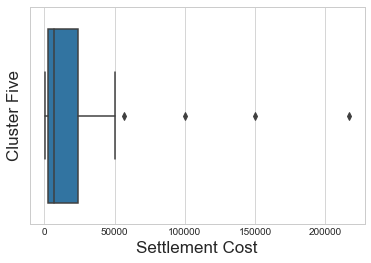

In [90]:
df_five = df_all[df_all['cluster_label'] == 5].reset_index(drop=True)
sns.set_style('whitegrid')
data = df_five
ax = sns.boxplot(df_five['Total'], data=data)
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Cluster Five', fontsize=17)
plt.show()

In [91]:
df_all[df_all['cluster_label'] == 6].describe()

,Total,violation_length,cluster_label
count,45.000000,45.000000,45.0
mean,1433.355556,22.911111,6.0
std,2017.354728,12.097750,0.0
min,300.000000,9.000000,6.0
25%,550.000000,11.000000,6.0
50%,850.000000,22.000000,6.0
75%,1000.000000,35.000000,6.0
max,10000.000000,46.000000,6.0


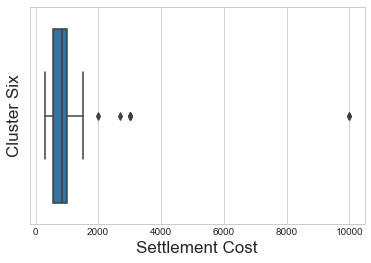

In [92]:
df_six = df_all[df_all['cluster_label'] == 6].reset_index(drop=True)
sns.set_style('whitegrid')
data = df_six
ax = sns.boxplot(df_six['Total'], data=data)
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Cluster Six', fontsize=17)
plt.show()

In [93]:
df_all[df_all['cluster_label'] == 0]['violation_data'].head(20)

47     operating a gasoline dispensing facility with ...
66     operating gasoline dispensing facility with a ...
84     operating a gasoline dispensing facility with ...
133    operating a gasoline dispensing facility with ...
134    operating a gasoline dispensing facility with ...
141    operating a gasoline dispensing facility with ...
146    failure to comply with notice to comply e item...
152    operating a gasoline dispensing facility with ...
231    operating a gasoline dispensing facility with ...
248    operating a gasoline dispensing facility with ...
251    operating a gasoline dispensing facility with ...
253    operating a gasoline dispensing facility with ...
254    operating a gasoline dispensing facility with ...
256    operating a gasoline dispensing facility with ...
261    operating a gasoline dispensing facility with ...
267    operating a gasoline dispensing facility with ...
289    operating a gasoline dispensing facility with ...
291    operating a gasoline dis

In [94]:
df_all[df_all['cluster_label'] == 1]['violation_data'].head(20)

1                     inaccurate qcers  inaccurate apep
2     failure to keep the roof of internal floating ...
3     failure to operate and maintain a continuous m...
4     selling architectural coatings within the scaq...
5     failure to conduct reverification test  months...
6     failure to post permit on site failure to prov...
8     two vapor recovery hoses leaking above  ppm vo...
9     operating an ajax boiler rated at  million btu...
10    emitting more than permitted limit for nox and...
11    operating gasoline dispensing equipment after ...
12    permit condition  gasoline dispensing facility...
13    failure to submit an annual permit emissions p...
14                      open ended line  uncapped valve
15    failed to submit daily emissions reports in a ...
16    operating a gasoline dispensing facility not a...
17    failure to show compliance by operating above ...
18    selling architectural coatings within the scaq...
19    the electronic report of daily mass emissi

In [95]:
df_all[df_all['cluster_label'] == 2]['violation_data'].head(20)

70      discharge of air contaminants which cause inju...
337     a person shall not discharge from any source w...
338     a person shall not discharge from any source w...
704     for discharging such quantities of air contami...
705     for discharging such quantities of air contami...
706     for discharging such quantities of air contami...
1000    for discharging such quantities  of air contam...
1001    for discharging such quantities of air contami...
1002    for discharging such quantities of air contami...
1003    for discharging such quantities of air contami...
1004    for discharging such quantities of air contami...
1005    for discharging such quantities of air contami...
1006    for discharging such quantities of air contami...
1007    for discharging such quantities of air contami...
1008    for discharging such quantities of air contami...
1009    for discharging such quantities of air contami...
1010    for discharging such quantities of air contami...
1011    for di

In [96]:
df_all[df_all['cluster_label'] == 3]['violation_data'].head(20)

7      operating a gasoline dispensing facility contr...
41     operating a gasoline dispensing facility contr...
42     operating a gasoline dispensing facility contr...
43     operating a gasoline dispensing facility contr...
111     operating a gasoline dispensing facility cont...
112     operating a gasoline dispensing facility cont...
124    operating a gasoline dispensing facility contr...
125    operating a gasoline dispensing facility contr...
126    operating a gasoline dispensing facility contr...
137    operating a gasoline dispensing facility contr...
169    failure to replace hose  within  days of issua...
229    failure to repairreplace vapor recovery compon...
255     operating a gasoline dispensing facility cont...
264    failure to conduct periodic compliance inspect...
298    operating a gasoline dispensing facility contr...
322    operating a gasoline dispensing facility contr...
489    operating a gasoline dispensing facility contr...
506    operating a gasoline dis

In [97]:
df_all[df_all['cluster_label'] == 4]['violation_data'].head(20)

56     failure to conduct vapor recovery testing semi...
76     failure to conduct vapor recovery reverificati...
145    failure to conduct vapor recovery reverificati...
168    failure to conduct vapor recovery reverificati...
175    failure to conduct vapor recovery reverificati...
218    failure to conduct vapor recovery reverificati...
236    failure to conduct vapor recovery reverificati...
241    failure to conduct vapor recovery reverificati...
246    operating a gasoline storage and dispensing sy...
297    failure to conduct vapor recovery reverificati...
318    failure to conduct vapor recovery system s rev...
377    failure to providrecords demonstrating complia...
492    failure to conduct vapor recovery reverificati...
523    failure to provide records demonstrating compl...
531    failure to conduct vapor recovery reverificiat...
538    failure to conduct vapor recovery testing in a...
539    failure to conduct vapor recovery testing in a...
547    failure to conduct vapor

In [98]:
df_all[df_all['cluster_label'] == 5]['violation_data'].head(20)

0       failed to reconcile quarterly nox emissions in...
89      failed to reconcile quarterly nox emissions in...
119     failed to reconcile quarterly nox emissions in...
277     failed to reconcile quarterly nox emissions in...
279     failed to reconcile quarterly nox emissions in...
282     failed to reconcile qrtrly nox emissions in th...
412     failed to reconcile quarterly nox emissions in...
468     failed to reconcile nox emissions in the first...
578      failed to reconcile quarterly nox emissions i...
685      failed to reconcile quarterly nox emissions i...
689     failed to reconcile quarterly nox emissions in...
923     for compliance year  nox emissions from the be...
1037    failed to reconcile quarterly nox emissions in...
1109     nox emissions from the beginning of the cy  t...
1110     failed to reconcile quarterly nox emissions i...
1152    failed to reconcile nox emissions in the fourt...
1168    failed to reconcile quarterly nox emissions in...
1202    failed

In [99]:
df_all[df_all['cluster_label'] == 6]['violation_data'].head(20)

243    operating a gasoline dispensing facility witho...
331    operating a gasoline dispensing facility witho...
387    operating a gasoline dispensing  facility with...
390    operating a gasoline dispensing facility witho...
518    operating a gasoline dispensing facility witho...
542    operating a gasoline dispensing facility witho...
610    operating a gasoline dispensing facility witho...
611    operating a gasoline dispensing facility witho...
672    operating a gasoline dispensing facility witho...
673    operating a gasoline dispensing facility witho...
675    operating gasoline dispensing facility without...
676     operating a gasoline dispensing facility with...
711    operating a gasoline dispensing facility witho...
715    operating a gasoline dispensing facility witho...
726    operating a gasoline dispensing facility witho...
733    operating a gasoline dispensing facility witho...
813    operating a gasoline dispensing facility witho...
814    operating a gasoline dis

In [100]:
df_one = df_all[df_all['cluster_label'] == 1].reset_index(drop=True)

In [101]:
df_one.describe()

,Total,violation_length,cluster_label
count,2.726000e+03,2726.000000,2726.0
mean,6.789427e+04,23.238811,1.0
std,5.828348e+05,11.106780,0.0
min,0.000000e+00,1.000000,1.0
25%,7.000000e+02,14.000000,1.0
50%,1.500000e+03,22.000000,1.0
75%,5.227800e+03,32.000000,1.0
max,8.100000e+06,121.000000,1.0


In [102]:
X = df_one['violation_data']
y = df_one['facility_type']

In [103]:
start = time.time()

metric_ = []
silhouette_avg_ = []
for i in range(2, 25):
    min_df = 0.01
    max_df = 0.90
    vect = CountVectorizer(stop_words='english', min_df=min_df, max_df=max_df, ngram_range=(3,4))
    X_dtm = vect.fit_transform(X)
    kmeans = KMeans(n_clusters=i, random_state=10)
    kmeans.fit(X_dtm)
    metric_.append(kmeans.inertia_)
    labels = kmeans.predict(X_dtm)
    silhouette_avg = silhouette_score(X_dtm, labels)
    silhouette_avg_.append(silhouette_avg)

end = time.time()
print('Elapsed time: ', end - start, 'seconds')

Elapsed time:  19.921920776367188 seconds


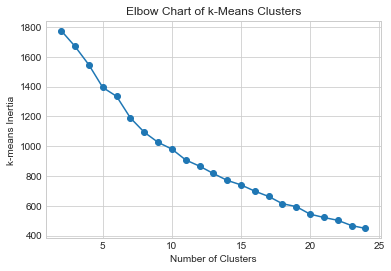

In [104]:
cluster = [x for x in range(2, 25)]
plt.scatter(cluster, metric_)
plt.plot(cluster, metric_)
plt.ylabel('k-means Inertia')
plt.xlabel('Number of Clusters')
plt.title('Elbow Chart of k-Means Clusters')
plt.show()

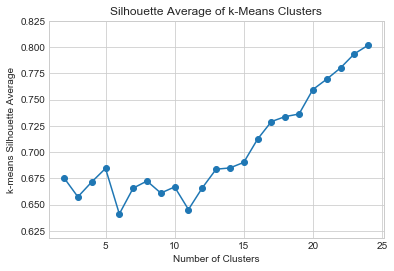

In [105]:
cluster = [x for x in range(2, 25)]
plt.scatter(cluster, silhouette_avg_)
plt.plot(cluster, silhouette_avg_)
plt.ylabel('k-means Silhouette Average')
plt.xlabel('Number of Clusters')
plt.title('Silhouette Average of k-Means Clusters')
plt.show()

In [106]:
X_dtm = vect.fit_transform(X)
X_dtm = vect.fit_transform(X)
kmeans = KMeans(n_clusters=24, random_state=10)
kmeans.fit(X_dtm)
labels = kmeans.predict(X_dtm)
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [107]:
df_one['cluster_label'] = pd.Series(labels, index=df_one.index)

In [108]:
df_one['violation_data'].head(20)

0                     inaccurate qcers  inaccurate apep
1     failure to keep the roof of internal floating ...
2     failure to operate and maintain a continuous m...
3     selling architectural coatings within the scaq...
4     failure to conduct reverification test  months...
5     failure to post permit on site failure to prov...
6     two vapor recovery hoses leaking above  ppm vo...
7     operating an ajax boiler rated at  million btu...
8     emitting more than permitted limit for nox and...
9     operating gasoline dispensing equipment after ...
10    permit condition  gasoline dispensing facility...
11    failure to submit an annual permit emissions p...
12                      open ended line  uncapped valve
13    failed to submit daily emissions reports in a ...
14    operating a gasoline dispensing facility not a...
15    failure to show compliance by operating above ...
16    selling architectural coatings within the scaq...
17    the electronic report of daily mass emissi